<a href="https://colab.research.google.com/github/srujanperam/pytorch_beginner_practice/blob/main/basic_neural_network_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [38]:
class Model(nn.Module):
    # hidden layer 1 is hidden number of neurons
    # h2 output is classification
    def __init__(self, in_features=4, h1=8, h2=9, out_feature=3):
        super().__init__() # instantiate nn.Module

        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_feature)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [39]:
torch.manual_seed(41)
model = Model()

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
url = 'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
df = pd.read_csv(url)

In [42]:
df.species.replace({"setosa": 0.0, "versicolor": 1.0, "virginica": 2.0}, inplace=True)

<ipython-input-42-71ee608b18b1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.species.replace({"setosa": 0.0, "versicolor": 1.0, "virginica": 2.0}, inplace=True)
<ipython-input-42-71ee608b18b1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.species.replace({"setosa": 0.0, "versicolor": 1.

In [43]:
X = df.drop("species", axis=1).values
y = df.species.values

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [46]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [47]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [48]:
model.train()
epochs = 300
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())

    if i%10 == 0:
        print(f'Epoch: {i} Loss: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 Loss: 1.1251550912857056
Epoch: 10 Loss: 1.0096259117126465
Epoch: 20 Loss: 0.8157405853271484
Epoch: 30 Loss: 0.585706353187561
Epoch: 40 Loss: 0.3999636471271515
Epoch: 50 Loss: 0.26768800616264343
Epoch: 60 Loss: 0.17942361533641815
Epoch: 70 Loss: 0.12151690572500229
Epoch: 80 Loss: 0.0860118493437767
Epoch: 90 Loss: 0.06520850956439972
Epoch: 100 Loss: 0.05286576226353645
Epoch: 110 Loss: 0.04508381709456444
Epoch: 120 Loss: 0.03979949280619621
Epoch: 130 Loss: 0.035970740020275116
Epoch: 140 Loss: 0.03293721750378609
Epoch: 150 Loss: 0.03041938506066799
Epoch: 160 Loss: 0.026795217767357826
Epoch: 170 Loss: 0.02338254824280739
Epoch: 180 Loss: 0.020531881600618362
Epoch: 190 Loss: 0.018495969474315643
Epoch: 200 Loss: 0.016802635043859482
Epoch: 210 Loss: 0.015519778244197369
Epoch: 220 Loss: 0.014496986754238605
Epoch: 230 Loss: 0.013443661853671074
Epoch: 240 Loss: 0.012677091173827648
Epoch: 250 Loss: 0.011877342127263546
Epoch: 260 Loss: 0.01128967385739088
Epoch: 27

Text(0.5, 0, 'Epoch')

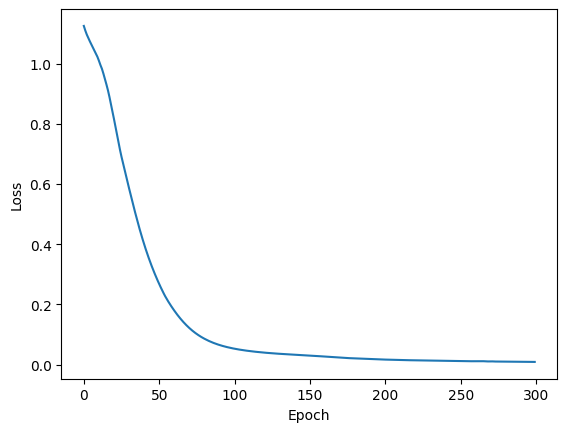

In [49]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [50]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [51]:
loss

tensor(0.2781)

In [52]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        print(f'{i+1}. {str(data.numpy()):25} {y_val.argmax().item()} {y_test[i]}')

        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f"you got {correct}")

1. [6.  2.2 5.  1.5]         2 2
2. [6.4 2.8 5.6 2.1]         2 2
3. [7.7 3.  6.1 2.3]         2 2
4. [6.1 3.  4.6 1.4]         1 1
5. [6.8 3.  5.5 2.1]         2 2
6. [6.1 2.8 4.  1.3]         1 1
7. [6.3 2.7 4.9 1.8]         2 2
8. [6.  3.4 4.5 1.6]         1 1
9. [6.5 3.  5.2 2. ]         2 2
10. [6.8 3.2 5.9 2.3]         2 2
11. [6.1 3.  4.9 1.8]         2 2
12. [5.1 3.4 1.5 0.2]         0 0
13. [4.4 3.  1.3 0.2]         0 0
14. [5.  2.3 3.3 1. ]         1 1
15. [5.1 3.3 1.7 0.5]         0 0
16. [6.3 2.8 5.1 1.5]         1 2
17. [4.8 3.1 1.6 0.2]         0 0
18. [6.  2.7 5.1 1.6]         2 1
19. [4.9 3.1 1.5 0.1]         0 0
20. [4.5 2.3 1.3 0.3]         0 0
21. [5.5 2.4 3.7 1. ]         1 1
22. [6.9 3.2 5.7 2.3]         2 2
23. [5.  3.5 1.6 0.6]         0 0
24. [4.7 3.2 1.3 0.2]         0 0
25. [5.6 2.9 3.6 1.3]         1 1
26. [6.  2.2 4.  1. ]         1 1
27. [6.3 3.3 4.7 1.6]         1 1
28. [5.8 2.7 4.1 1. ]         1 1
29. [5.  3.3 1.4 0.2]         0 0
30. [6.1 2.9 4.7 1.4]  

In [53]:
new_data = torch.tensor([5.1, 3.5, 1.4, 0.2])

In [54]:
with torch.no_grad():
    print(model.forward(new_data))

tensor([ 29.9588,  19.6237, -47.4240])


In [55]:
new_data = torch.tensor([4.9, 3.0, 1.4, 0.2])

In [56]:
with torch.no_grad():
    print(model.forward(new_data))

tensor([ 27.4873,  18.3247, -43.6906])


In [62]:
new_data = torch.tensor([2.6, 2.2, 5.1, 0.1])
with torch.no_grad():
    print(model.forward(new_data))

tensor([-3.5138,  0.7361,  6.6839])


In [63]:
torch.save(model.state_dict(), 'iris_model.pt')

In [64]:
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<ipython-input-64-7c1c09c835da>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('iris_model.pt'))


<All keys matched successfully>

In [65]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)